<a href="https://colab.research.google.com/github/JaiswalFelipe/Dissertation-Project/blob/main/patcher_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio
!pip install patchify
!pip install imagecodecs
!pip install tifffile 
!pip install GDAL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os 
import cv2
import rasterio
import numpy as np
import tifffile as tiff
import imageio

from skimage import transform
from skimage import img_as_float
from matplotlib import pyplot as plt
from patchify import patchify, unpatchify
from PIL import Image
from rasterio.plot import show
from osgeo import gdal 
from sklearn.preprocessing import MinMaxScaler, StandardScaler


scaler = MinMaxScaler()

# With band extraction experiment
- The current image loaded is a result for "patcher experiment for list"
- extracting 3 bands works

In [ ]:
#def image_patcher(img_name, input_file, output_folder, division):
data = gdal.Open("/content/drive/MyDrive/Dissertation/ng_data/tile_1599_image_stack.tif")

band1 = data.GetRasterBand(1).ReadAsArray() # float32
band2 = data.GetRasterBand(2).ReadAsArray()
band3 = data.GetRasterBand(3).ReadAsArray()

img = np.dstack((band3,band2,band1))

print(type(img))

<class 'numpy.ndarray'>


In [ ]:
patches = []

w, h = img.shape[1], img.shape[0] 
for i in range(0, w, 250):
  for j in range(0, h, 250):
                
    cur_x = i
    cur_y = j
    patch = img[cur_x:cur_x + 250, cur_y:cur_y + 250]
    patch = scaler.fit_transform(patch.reshape(-1, patch.shape[-1])).reshape(patch.shape)                
    patches.append(patch)

    tiff.imwrite("/content/drive/MyDrive/patch_test_run1/" + "patch_" + str(i)+ str(j) + ".tif", patch)


In [ ]:
temp_mask = imageio.imread("/content/drive/MyDrive/Dissertation/ng_data/masks/tile_1599_image_mask.tif").astype(int)

#mask_patches = []

w, h = temp_mask.shape[1], temp_mask.shape[0] 
for i in range(0, w, 250):
  for j in range(0, h, 250):
                
    cur_x = i
    cur_y = j
    mask_patch = temp_mask[cur_x:cur_x + 250, cur_y:cur_y + 250]
#    mask_patches.append(mask_patch)

    tiff.imwrite("/content/drive/MyDrive/patch_test_run1_mask/" + "patch_" + str(i)+ str(j) + ".tif", mask_patch)


- Number of bands in the image (23, 250)
- Labels and corresponding pixels in the mask:  [0 1] [ 48 202]


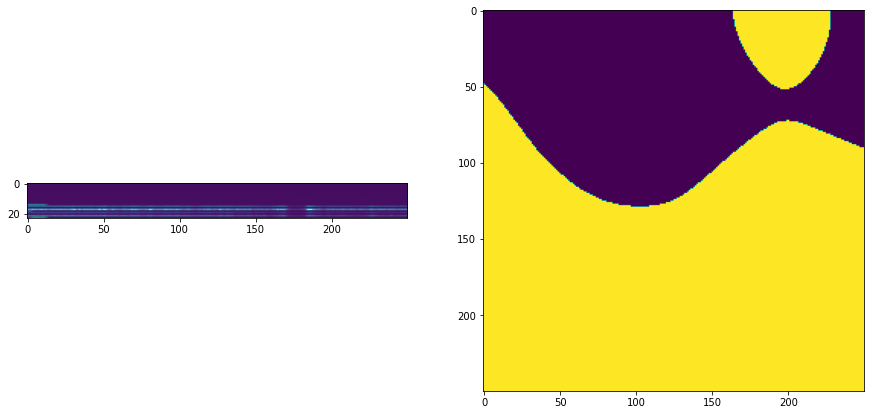

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 15

patch_sample = img_as_float(imageio.imread("/content/drive/MyDrive/patch_test_run2/patch_01000.tif"))


mask = imageio.imread("/content/drive/MyDrive/patch_test_run1_mask/patch_01000.tif").astype(int)
labels, count = np.unique(mask[:,0], return_counts = True)

# Check number of bands
print("- Number of bands in the image",patch_sample.shape)
print("- Labels and corresponding pixels in the mask: ",labels, count)

fig, ax = plt.subplots(1,2)
ax[0].imshow(patch_sample)
ax[1].imshow(mask)

# patcher experiment for list

In [ ]:
def test_patcher(image):
  img = img_as_float(imageio.imread(image))

  patches = []

  w, h = img.shape[1], img.shape[0] 
  for i in range(0, w, 250):
    for j in range(0, h, 250):
                
      cur_x = i
      cur_y = j
      patch = img[cur_x:cur_x + 250, cur_y:cur_y + 250]
      patch = scaler.fit_transform(patch.reshape(-1, patch.shape[-1])).reshape(patch.shape)                
      patches.append(patch)

  return patches



    #tiff.imwrite("/content/drive/MyDrive/patch_test_run1/" + "patch_" + str(i)+ str(j) + ".tif", patch)


In [ ]:
my_list = test_patcher("/content/drive/MyDrive/Dissertation/ng_data/tile_1599_image_stack.tif")

In [ ]:
ar_my_list = np.array(my_list)

print(type(ar_my_list))
print(ar_my_list.shape)

<class 'numpy.ndarray'>
(256, 250, 250, 23)
